In [2]:
import os

dataset_path = "dataset"   # change to your actual folder

# Count only directories inside the dataset folder
folders = [
    name for name in os.listdir(dataset_path)
    if os.path.isdir(os.path.join(dataset_path, name))
]

print("Number of folders:", len(folders))


Number of folders: 5602


In [2]:
from dataloader import load_parquet, preprocess_data, SlidingWindowDataset
from plotting import plot_testresult_sample
from torch.utils.data import DataLoader
import pandas as pd
from utils import deltas_to_coords

df = load_parquet("dataset", k=1000) # cannot load all ids without gpu-job due to memory error
df.describe()

/zhome/b1/8/213657/DeepLearning/dataloader.py:168: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  df.set_index("Timestamp")


,Timestamp,Latitude,Longitude,SOG,COG,Segment,x,y
count,516416,516416.000000,516416.000000,516416.000000,516416.000000,516416.000000,5.164160e+05,5.164160e+05
mean,2025-10-08 04:07:41.441705984,55.901250,10.934692,2.473947,180.126484,0.415688,1.217244e+06,7.542026e+06
min,2025-10-01 00:00:00,52.349723,2.643391,0.000000,0.000000,0.000000,2.942610e+05,6.863609e+06
25%,2025-10-04 09:42:00,55.009034,9.737579,0.000000,98.234295,0.000000,1.083982e+06,7.363620e+06
50%,2025-10-08 07:00:00,55.666685,11.037824,1.226011,185.200000,0.000000,1.228725e+06,7.492346e+06
75%,2025-10-11 22:48:00,56.767701,12.438725,4.844071,253.292969,0.000000,1.384673e+06,7.712786e+06
max,2025-10-14 23:54:00,59.434576,16.631775,20.268072,359.900000,21.000000,1.851441e+06,8.274914e+06
std,NaN,1.118885,2.111446,2.830061,96.342019,1.427291,2.350451e+05,2.238428e+05


In [3]:
df = preprocess_data(df)
df.describe()

,Timestamp,Latitude,Longitude,SOG,COG,Segment,x,y
count,263084,263084.000000,263084.000000,263084.000000,263084.000000,263084.000000,2.630840e+05,2.630840e+05
mean,2025-10-08 07:01:02.210853376,55.992026,10.892352,4.718250,177.773047,0.595095,1.212531e+06,7.560618e+06
min,2025-10-01 00:06:00,52.349723,2.643391,0.000000,0.000000,0.000000,2.942610e+05,6.863609e+06
25%,2025-10-04 11:42:00,54.930668,9.520499,3.168118,84.726147,0.000000,1.059817e+06,7.348422e+06
50%,2025-10-08 11:54:00,55.719150,11.040744,4.785937,185.866607,0.000000,1.229050e+06,7.502708e+06
75%,2025-10-12 01:48:00,57.120039,12.400538,6.083889,255.427399,0.000000,1.380422e+06,7.784693e+06
max,2025-10-14 23:54:00,59.434576,16.631775,20.268072,359.700000,20.000000,1.851441e+06,8.274914e+06
std,NaN,1.207690,2.338371,2.265826,99.664426,1.640628,2.603062e+05,2.417586e+05


In [4]:
# Make sure Timestamp is a proper datetime column
df["Timestamp"] = pd.to_datetime(df["Timestamp"], errors="coerce")

# Extract the hour of the day (0–23)
df["hour"] = df["Timestamp"].dt.hour

# Count rows per hour
hour_counts = df["hour"].value_counts().sort_index()



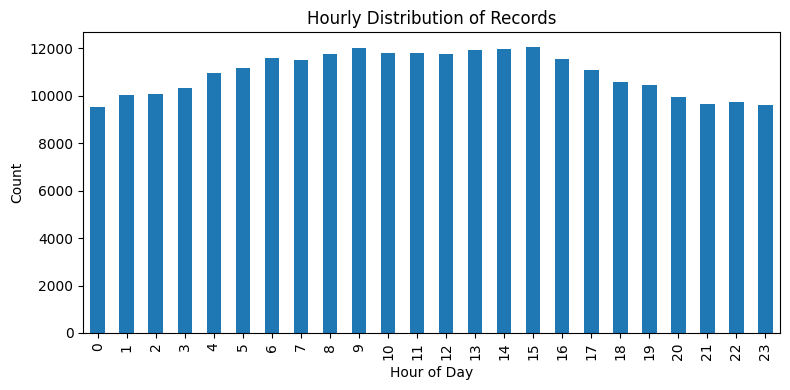

In [5]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
hour_counts.plot(kind="bar")
plt.xlabel("Hour of Day")
plt.ylabel("Count")
plt.title("Hourly Distribution of Records")
plt.tight_layout()
plt.show()
